# Popular Data Science Questions

The goal of this project is to use [Data Science Stack Exchange (DDSE)](https://datascience.stackexchange.com/) to determine what content should a data science education company create, based on interest by subject.

## 1. Stack Exchange 

#### What kind of questions are welcome on this site?

The DSSE's help center has tips regarding [good questions](https://datascience.stackexchange.com/help/how-to-ask) as following:

- Be on-topic
- Be specific
- Make it relevant to others
- Keep an open mind


#### What, other than questions, does the site's home subdivide into?

There are 4 sections on the DSSE's home page:
* Questions - a list of questions
* Tags - a keyword or label that categorizes your question 

![tags_ds](https://dq-content.s3.amazonaws.com/469/tags_ds.png)

* Users - a list of users
* Unanswered - a list of unanswered questions


Does any of them look useful towards our goal?
* Using the right tags makes it easier for others to find and answer question.  It useful for us to solve this problem. 

#### What information is available in each post?

For both questions and answers: 

- The posts's author;
- The posts's score;
- The posts's time;
- The posts's body;
- The posts's votes;


For questions only: 

- The question's tag;
- How many answers;
- The last time the question was active;
- How many times the question was viewed;
- Related questions;


## 2. Stack Exchange  Data Explore (SEDE)


Stack Exchange provides a public data base for each of its websites. Here's a [link](https://data.stackexchange.com/datascience/query/new) to query and explore Data Science Stack Exchange's database.

There are a few stand out as relevant for our goal:

- Posts
- PostTags
- Tags
- TagSynonyms

Run query on the Tags table, the result is following;


|Id|TagName|Count|ExcerptPostId|WikiPostId|
|---|----|----|----|----|
|1|.net|303895|3624959|3607476|
|2|html|1042475|3673183|3673182|
|3|javascript|2141559|3624960|3607052|
|4|css|697790|3644670|3644669|
|5|php|1384449|3624936|3607050|
|8|c    |347665|3624961|3607013|


## 3. Getting the Data

We are intrested in following columns:
- Id: An identification number for the post.
- PostTypeId: An identification number for the type of post.
- CreationDate: The date and time of creation of the post.
- Score: The post's score.
- ViewCount: How many times the post was viewed.
- Tags: What tags were used.
- AnswerCount: How many answers the question got (only applicable to question posts).
- FavoriteCount: H

Run a query against the SEDE DSSE database that extracts the above columns for all the questions in 2020:
```
SELECT ID, CreationDate,Score, ViewCount, 
     Tags, AnswerCount, FavoriteCount
FROM posts
 WHERE PostTypeID = 1 AND YEAR(CreationDate) = 2019;
```
|ID|CreationDate|Score|ViewCount|Tags|AnswerCount|FavoriteCount|
|---|---|---|---|---|---|---|
|44419|1/23/2019 9:21|1|21|<machine-learning><data-mining>|0|
|44420|1/23/2019 9:34|0|25|<machine-learning><regression><linear-regression><regularization>|0|
|44423|1/23/2019 9:58|2|1651|<python><time-series><forecast><forecasting>|0|
|44427|1/23/2019 10:57|0|55|<machine-learning><scikit-learn><pca>|1| 
|44428|1/23/2019 11:02|0|19|<dataset><bigdata><data><speech-to-text>|0| 


## 4. Exploring the Data

The result of the query was stored in a file called 2019_questions.csv

Let's read in the file into a dataframe. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Read in the file into a dataframe. 
questions = pd.read_csv("2019_questions.csv", parse_dates=["CreationDate"])
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


In [4]:
questions.head(3)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN


In [5]:
questions["Tags"].apply(lambda value: type(value)).unique()

array([<class 'str'>], dtype=object)

Try to answer a few of these questions in a markdown cell:

- How many missing values are there in each column?
  - Only FavoriteCount column has missing values.
- Can we fix the missing values somehow?
  - We can fill the missing values of FavoriteCount with 0
- Are the types of each column adequate?
  - The tag column data type should be string
- What can we do about the Tags column?
  - We can replace charactor "<>", and make the column easy to read

## 5. Cleaning the Data

1. Fill in the missing values with 0.
2. Set the types of each column in accordance to what was illustrated above.
 - Id                        int64
 - CreationDate     datetime64[ns]
 - Score                     int64
 - ViewCount                 int64
 - Tags                     object
 - AnswerCount               int64
 - FavoriteCount             int64
3. Clean the Tags column and assign it back to itself:


In [6]:
questions["FavoriteCount"].fillna(value=0, inplace=True)
questions["FavoriteCount"]= questions["FavoriteCount"].astype(int)
questions["Tags"]=questions["Tags"].str.replace("^<|>$","").str.split("><")
questions.sample(5)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
6422,64041,2019-11-30 21:50:32,0,8,"[clustering, statistics, data-analysis, descri...",0,0
7595,64820,2019-12-14 08:13:22,0,25,"[machine-learning, neural-network, cnn, image-...",0,0
6115,63769,2019-11-26 06:34:57,2,31,"[machine-learning, neural-network, linear-alge...",1,0
959,45680,2019-02-16 10:16:08,2,168,[cnn],1,0
548,56201,2019-07-23 03:50:04,0,28,"[machine-learning, classification, cnn, data-c...",0,0


##  6. Most Used and Most Viewed

- Count how many times each tag was used.
- Count how many times each tag was viewed.
- Create visualizations for the top 20 tags of each of the above results.

In [7]:
tag_count ={}

for tags in questions["Tags"]:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] +=1
        else:
            tag_count[tag] =1
            
tag_count  = pd.DataFrame.from_dict(tag_count, orient='index')         
tag_count.rename(columns={0: "Count"}, inplace=True)

In [8]:
most_used = tag_count.sort_values(by=["Count"]).tail(20)
most_used

,Count
machine-learning-model,224
statistics,234
clustering,257
predictive-modeling,265
r,268
dataset,340
regression,347
pandas,354
lstm,402
time-series,466


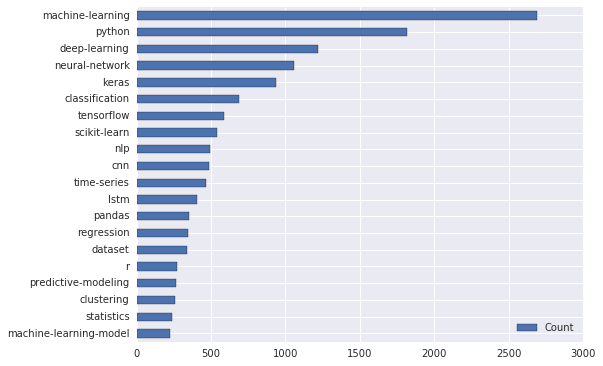

In [9]:
most_used.plot(kind='barh',figsize=(8,6))

We'll use pandas's pandas.DataFrame.iterrows() to count times that tag was viewed

In [10]:
tag_view_count ={}

for index, row in questions.iterrows():
    for tag in row['Tags']:
        if tag in tag_view_count:
            tag_view_count[tag] +=row['ViewCount']
        else:
            tag_view_count[tag] =row['ViewCount']
            
tag_view_count  = pd.DataFrame.from_dict(tag_view_count, orient='index')         
tag_view_count.rename(columns={0: "View Count"}, inplace=True)

In [11]:
most_viewed = tag_view_count.sort_values(by=["View Count"]).tail(20)
most_viewed

,View Count
clustering,33928
csv,38654
pytorch,40240
dataset,43151
regression,49451
numpy,49767
time-series,64134
cnn,70349
nlp,71382
lstm,74458


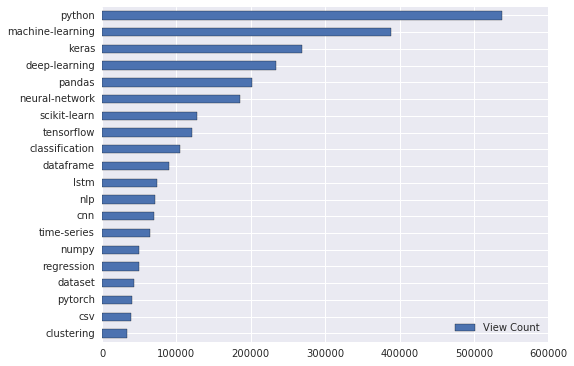

In [12]:
most_viewed.plot(kind='barh',figsize=(8,6))

###  7. Relation Between Tags

In [13]:
# Create a list of tags
all_tags = list(tag_count.index)

# Create a dataframe where each row and columne will represent a tag, and fill the value with 0
associations = pd.DataFrame(index=all_tags, columns=all_tags)
associations.fillna(0, inplace=True)
associations.iloc[0:4,0:4]

,feature-extraction,randomized-algorithms,software-development,java
feature-extraction,0,0,0,0
randomized-algorithms,0,0,0,0
software-development,0,0,0,0
java,0,0,0,0


In [14]:
# [tags, tags] example: [[machine-learning, data-mining],[machine-learning, data-mining]]
# Using [tags, tags] to count total of the tags
for tags in questions["Tags"]:
    associations.loc[tags, tags] += 1
associations.sample(5) 

,feature-extraction,randomized-algorithms,software-development,java,expectation-maximization,sas,image,learning-rate,tools,scikit-learn,...,automation,information-retrieval,text-classification,audio-recognition,probability-calibration,proximal-svm,prediction,cost-function,methods,notation
gradient-descent,0,0,0,0,0,0,0,1,0,4,...,0,0,0,0,0,0,0,4,0,0
mathematics,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
programming,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
genetic-programming,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
reference-request,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [22]:
# let focus on most used tags
relations_most_used = associations.loc[most_used.index, most_used.index]
relations_most_used

,machine-learning-model,statistics,clustering,predictive-modeling,r,dataset,regression,pandas,lstm,time-series,cnn,nlp,scikit-learn,tensorflow,classification,keras,neural-network,deep-learning,python,machine-learning
machine-learning-model,224,3,3,21,7,12,8,4,5,7,4,4,18,9,21,17,10,19,37,139
statistics,3,234,3,16,16,17,16,3,1,22,1,3,6,0,19,3,11,12,35,89
clustering,3,3,257,0,16,5,2,5,3,20,0,9,24,0,12,0,8,2,45,61
predictive-modeling,21,16,0,265,13,7,28,4,13,31,6,1,12,6,27,11,13,32,35,123
r,7,16,16,13,268,6,10,2,3,22,2,4,1,1,10,10,9,5,24,63
dataset,12,17,5,7,6,340,6,14,7,6,11,11,9,9,28,13,20,32,53,99
regression,8,16,2,28,10,6,347,6,11,24,6,2,37,9,34,31,42,21,59,119
pandas,4,3,5,4,2,14,6,354,7,19,1,3,37,3,3,3,1,1,244,62
lstm,5,1,3,13,3,7,11,7,402,87,24,19,2,43,20,133,69,103,61,71
time-series,7,22,20,31,22,6,24,19,87,466,8,0,12,9,25,51,33,44,105,131


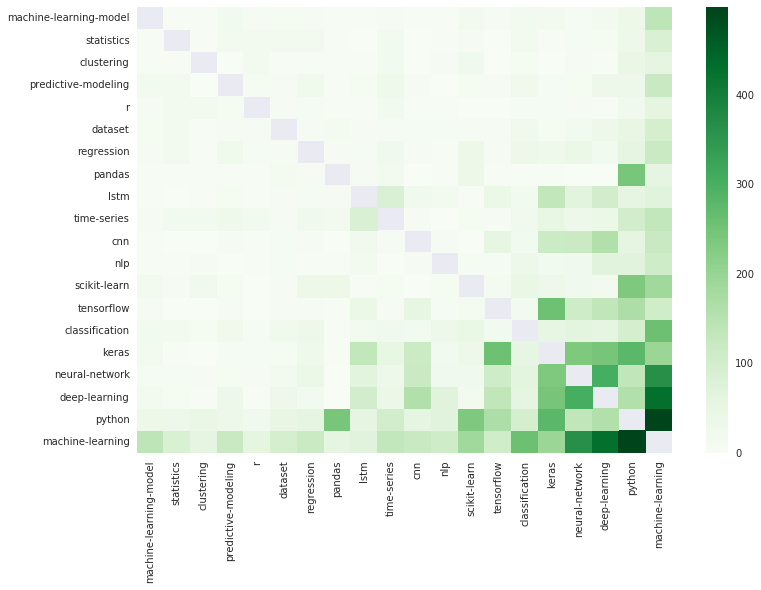

In [15]:
# let focus on most used tags
relations_most_used = associations.loc[most_used.index, most_used.index]

# set relationships between same tag to Nan
for i in range(relations_most_used.shape[0]):
    relations_most_used.iloc[i,i] = pd.np.NaN

# Use heatmap to show pair relationship
plt.figure(figsize=(12,8))
sns.heatmap(relations_most_used, cmap="Greens", annot=False)

The most used tags also have the strongest relationships, showed by the dark concentration in the bottom right corner. 

### 8. Domain Knowledge

- Keras, scikit-learn, TensorFlow are all Python libraries. 
- Most of the top tags are related to machine learning
- The most popular topic is deep learning

### 9. Is deep learning just a fad? 


We will track the interest in deep learning across time. We will:

- Count how many deep learning questions are asked per quater.
- The total amount of questions per quater
- How many deep learning questions there are relative to the total amount of questions per quater

In [16]:
#  Read the file all_questions.csv into a dataframe.
all_questions = pd.read_csv("all_questions.csv", parse_dates=["CreationDate"])

# Transform the tags column in a similar manner to what was previously done.
all_questions["Tags"]=all_questions["Tags"].str.replace("^<|>$","").str.split("><")
all_questions.sample(5)

,Id,CreationDate,Tags
936,55815,2019-07-17 06:46:12,[machine-learning]
1247,45907,2019-02-20 18:08:59,"[neural-network, deep-learning, keras, data-cl..."
9448,49591,2019-04-19 13:43:30,"[data-mining, nlp, web-scrapping]"
8778,60149,2019-09-13 09:35:57,"[deep-learning, cnn, faster-rcnn, deep-network]"
18204,12297,2016-06-20 08:25:20,"[machine-learning, markov-process, online-lear..."


Based on the most_used tags and the releation to deep learning, we have made a deep leanring tag list: ["deep-learning","neural-network","scikit-lear","keras","tensorflow" ,"classification" ,"cnn", "lstm","nlp"], 

We'll now create a function that assigns 1 to deep learning questions and 0 otherwise; and we use it.

In [17]:
def deep_learning_releated(tags):
    for tag in tags: 
        if tag in ["deep-learning","neural-network",
                   "scikit-lear","keras","tensorflow",
                   "classification","cnn", "lstm","nlp"]:
            return 1
    return 0

all_questions['DeepLearning'] = all_questions['Tags'].apply(deep_learning_releated)

all_questions.sample(5)

,Id,CreationDate,Tags,DeepLearning
17038,63524,2019-11-21 08:42:37,"[machine-learning, deep-learning, time-series,...",1
6287,58057,2019-08-23 06:25:14,"[machine-learning, time-series, regression, me...",0
1389,45999,2019-02-22 07:37:11,"[machine-learning, python, deep-learning, reco...",1
1488,15236,2016-11-20 00:03:37,"[neural-network, beginner, convnet, computer-v...",1
13116,52047,2019-05-16 06:50:58,"[machine-learning, r, xgboost, sampling]",0


In [18]:
# we'll get rid of data for year 20121 
all_questions = all_questions[all_questions["CreationDate"].dt.year < 2021]

In [19]:
 # Identifies the quarter in which a deep learning question was asked.
def count_by_q(datatime):
    year = str(datatime.year)[-2:]
    quater =  str((datatime.month-1)//3+1)
    return "{y}Q{q}".format(y=year,q=quater)
all_questions['Quarter'] = all_questions['CreationDate'].apply(count_by_q)
all_questions.sample(5)

,Id,CreationDate,Tags,DeepLearning,Quarter
2518,25619,2017-12-13 08:29:42,"[machine-learning, neural-network, keras]",1,17Q4
1260,45941,2019-02-21 10:25:07,"[keras, nlp, word-embeddings, attention-mechan...",1,19Q1
5641,5464,2015-04-06 17:36:22,"[bigdata, terminology]",0,15Q2
2704,1092,2014-09-08 21:25:26,[machine-learning],0,14Q3
18309,32980,2018-06-12 01:55:00,"[neural-network, hyperparameter, hyperparamete...",1,18Q2


We'll group by quarter and:
- Count how many deep learning questions are asked per quater.
- The total amount of questions per quater
- How many deep learning questions there are relative to the total amount of questions per quater

In [20]:
quarterly = all_questions.groupby('Quarter').agg({"DeepLearning": ['sum', 'size']})
quarterly.columns = ['DeepLearningQuestions', 'TotalQuestions']
quarterly["DeepLearningRatio"] = quarterly["DeepLearningQuestions"]/quarterly["TotalQuestions"]
# reset_index after groupby, change two levels of index to one level
quarterly.reset_index(inplace=True)
quarterly.sample(5)

,Quarter,DeepLearningQuestions,TotalQuestions,DeepLearningRatio
12,17Q2,272,647,0.420402
3,15Q1,34,190,0.178947
5,15Q3,83,311,0.266881
17,18Q3,761,1512,0.503307
21,19Q3,1020,2394,0.426065


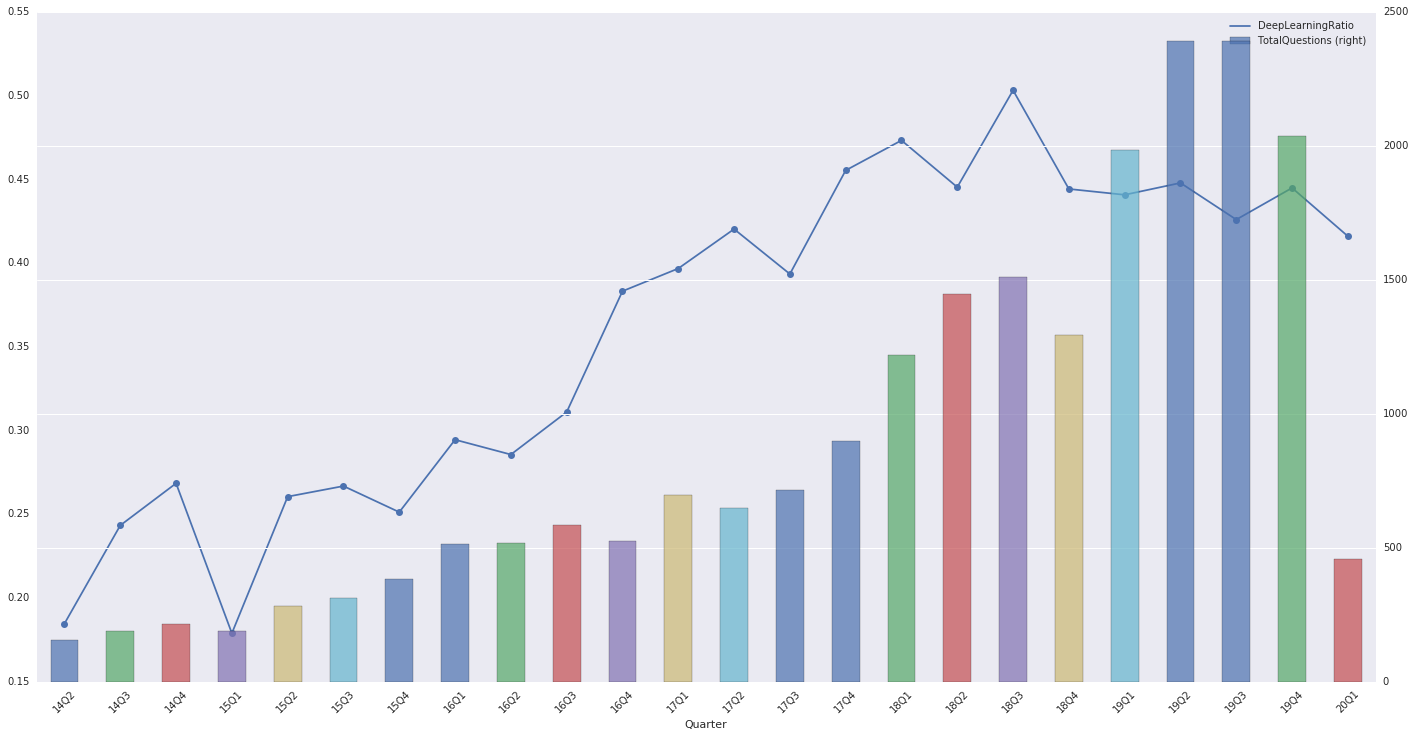

In [21]:
ax1 = quarterly.plot(x="Quarter", y="DeepLearningRatio",
                    kind="line",  figsize=(24,12) , marker="o")                

ax2 = quarterly.plot(x="Quarter", y="TotalQuestions",
                     kind="bar", ax=ax1, secondary_y=True, alpha=0.7, rot=45)

### Conclusion


Deep learning questions was in a high-growth trend since the start of DSSE. We propose that we create deep learning content.      
